In [3]:
import datetime
import requests
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
plt.rcParams['figure.figsize'] = (15.0, 10.0)


## First we need to get the last three years data.
This code will ensure that it's up to date

In [4]:
today_epoch = (datetime.date.today() - datetime.timedelta(days=1)).strftime("%s")
threeyear_epoch = (datetime.date.today() - datetime.timedelta(days=(365*3))).strftime("%s")


## Download that 3 year data

In [5]:
data_url = "https://query1.finance.yahoo.com/v7/finance/download/MSFT?period1=%s&period2=%s&interval=1d&events=history" % (threeyear_epoch,today_epoch)
req = requests.get(data_url)
url_content = req.content
csv_file = open('msft-3-year.csv', 'wb')

csv_file.write(url_content)
csv_file.close()

In [6]:
df = pd.read_csv('msft-3-year.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-08-17,73.580002,73.870003,72.400002,72.400002,69.397232,22977500
1,2017-08-18,72.269997,72.839996,71.930000,72.489998,69.483498,18761500
2,2017-08-21,72.470001,72.480003,71.699997,72.150002,69.157600,17734800
3,2017-08-22,72.349998,73.239998,72.349998,73.160004,70.125717,14343700
4,2017-08-23,72.959999,73.150002,72.529999,72.720001,69.703972,13766500


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,754.000000,754.000000,754.000000,754.000000,754.000000,7.540000e+02
mean,124.604045,125.839125,123.253846,124.630491,122.703869,3.004372e+07
std,35.674979,36.190736,35.130246,35.726536,36.721302,1.461705e+07
min,72.250000,72.480003,71.699997,72.150002,69.157600,7.425600e+06
25%,97.365000,97.954998,96.354997,97.425002,94.611149,2.059458e+07
50%,112.854999,113.559997,111.694999,112.660000,110.478375,2.611850e+07
75%,144.722500,146.930004,143.147499,144.527504,143.246090,3.438745e+07
max,216.330002,217.639999,211.570007,216.539993,216.539993,1.112421e+08


In [22]:
minPrice = df.describe()["Adj Close"]["min"]
print("min:",minPrice, "min date:")
print(df[df["Adj Close"]==minPrice]["Date"])
maxPrice = df.describe()["Adj Close"]["max"]
print("max:",maxPrice, "max date:")
print(df[df["Adj Close"]==maxPrice]["Date"])
maxVol = df.describe()["Volume"]["max"]
print("max vol:",maxVol, "max vol date:")
df[df["Volume"]==maxVol]["Date"]

min: 69.1576 min date:
2    2017-08-21
Name: Date, dtype: object
max: 216.539993 max date:
744    2020-08-03
Name: Date, dtype: object
max vol: 111242100.0 max vol date:


339    2018-12-21
Name: Date, dtype: object

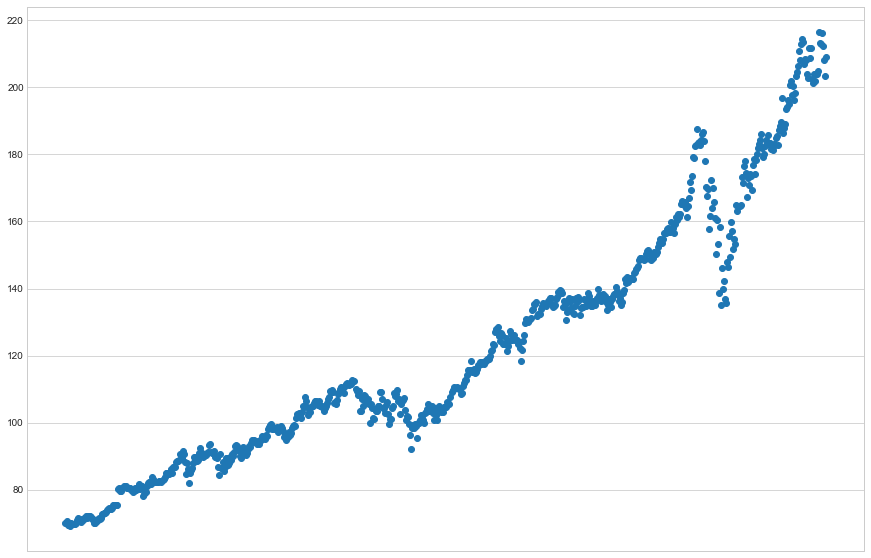

In [35]:
fig, ax = plt.subplots()
rule = rrulewrapper(YEARLY, interval=1)
loc = RRuleLocator(rule)
formatter = DateFormatter('%m/%d/%y')
plt.plot_date(df["Date"], df["Adj Close"])
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)

In [17]:
data = df.loc[1:,"Adj Close"].tolist()
cumsum_vec = np.cumsum(np.insert(data, 0, 0)) 
window_width=7
ma_vec = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width

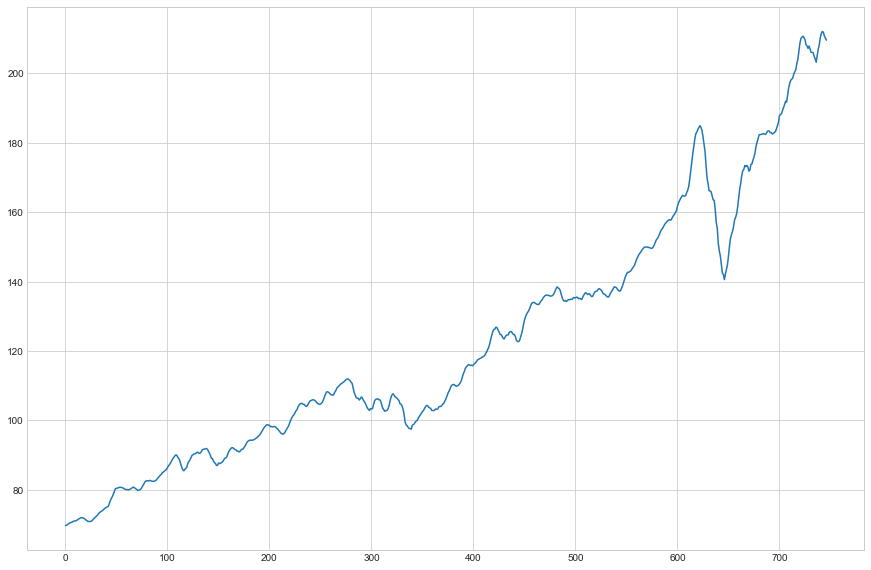

In [18]:
plt.plot(ma_vec)

/Users/david/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


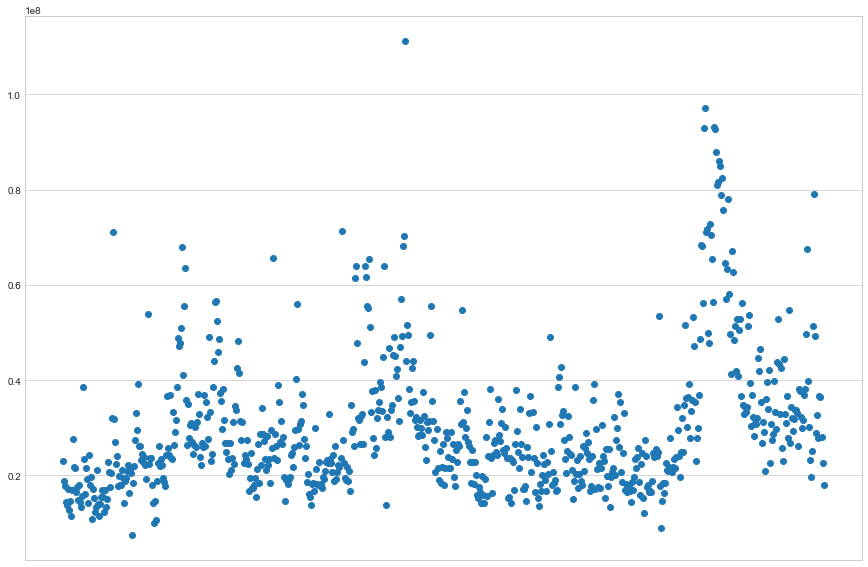

In [19]:
fig, ax = plt.subplots()
rule = rrulewrapper(YEARLY, interval=1)
loc = RRuleLocator(rule)
formatter = DateFormatter('%m/%d/%y')
plt.plot_date(df["Date"], df["Volume"])
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)

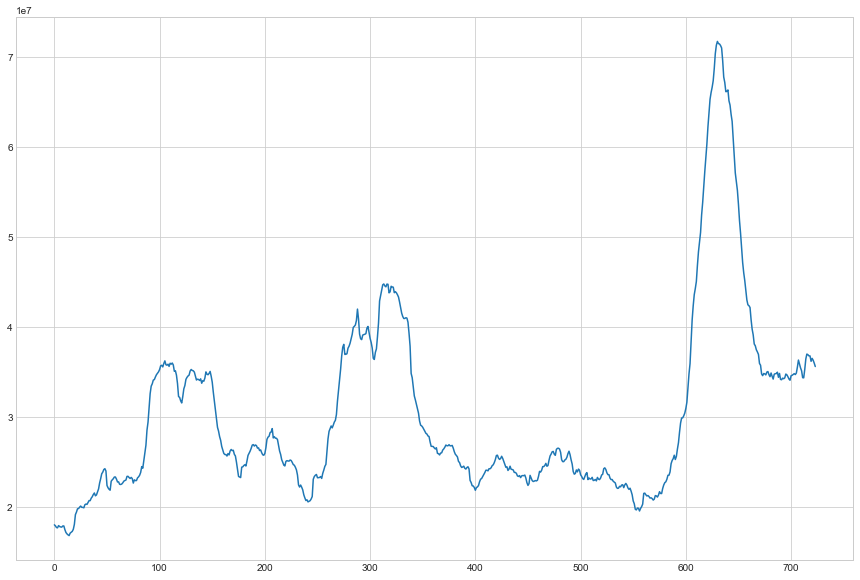

In [26]:
data = df.loc[1:,"Volume"].tolist()
cumsum_vec = np.cumsum(np.insert(data, 0, 0)) 
window_width=30
ma_vec = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width
plt.plot(ma_vec)